# Fully Connected Neural Networks (FCNN)
### a.k.a. Multilayer Perceptron (MLP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Download the MNIST data set

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#- Get info of train and test data sets
N_train,dim0,dim1 = x_train.shape
N_test,dim0,dim1  = x_test.shape
num_classes = 10

## Create the FCNN model. 
  ( There are two equivalent options )


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

choice_code = 'all_in_one' # 'all_in_one' , 'with_add'

if choice_code == 'all_in_one':
  model = Sequential([
      Dense(32, input_shape=(784,)),
      Activation('relu'),
      Dense(10),
      Activation('softmax'),
  ])
elif choice_code == 'with_add':
  model = Sequential()
  model.add(Dense(32, input_dim=784))
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  


Compile the model, according to the problem it tackles. 
  (In this example, we face the multi-class problem of labelling the image of a digit from 0 to 9 )

In [5]:
choice_problem = 'Nclasses' # 'Nclasses', '2classes', 'regression'

if choice_problem == 'Nclasses':
  # For a multi-class classification problem
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
elif choice_problem == '2classes':
  # For a binary classification problem
  model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
elif choice_problem == 'regression':
  # For a mean squared error regression problem
  model.compile(optimizer='rmsprop',
                loss='mse')
else:
  print('--- choose a valid option ---')

## Learn

For learning a FCNN we first have to transform the data set into a table of Ns samples and 28x28 features (pixels)

In [6]:
x_flat = x_train.reshape((N_train,dim0*dim1))

Next, a multi-class problem requires one-hot codification of labels (Y_train & Y_test)

In [7]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical one-hot encoding
y_1hot = to_categorical(y_train, num_classes=num_classes)

Learn the model

In [7]:
# Train the model, iterating on the data in batches of 32 samples
N_epochs = 10
batch_size = 32
model.fit(x_flat, y_1hot, epochs=N_epochs, batch_size=batch_size)

W0725 18:46:13.595651 140481870894976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0725 18:46:13.667996 140481870894976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 4s 62us/step - loss: 6.9073 - acc: 0.5653
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 5.7116 - acc: 0.6424
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 4.6159 - acc: 0.7102
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 4.0965 - acc: 0.7432
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 4.0120 - acc: 0.7490
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 3.9603 - acc: 0.7525
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 3.9134 - acc: 0.7555
Epoch 8/10
60000/60000 [==============================] - 3s 45us/step - loss: 3.8853 - acc: 0.7573
Epoch 9/10
60000/60000 [==============================] - 3s 45us/step - loss: 3.8366 - acc: 0.7604
Epoch 10/10
60000/60000 [==============================] - 3s 45us/step - loss: 3.8445 - acc: 0.7601

## Test

As when learning, prior to testing, we have to flatten the test images and one-hot-code the labels

In [0]:
x = x_test.reshape((N_test,dim0*dim1))
y = to_categorical(y_test, num_classes=num_classes)

In [0]:
yhat = model.predict(x)
class_hat = model.predict_classes(x)

In [10]:
score = model.evaluate(x, y, batch_size=128)
print(score)

10000/10000 [==============================] - 0s 11us/step
[3.8354277473449705, 0.7614]


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] <-- y
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] <-- yhat: number 6


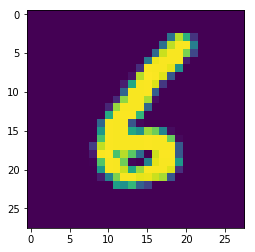

In [11]:
''' Try the test image number K '''
k = 1196
print(y[k,:],'<-- y')
print(yhat[k,:],'<-- yhat:','number',class_hat[k])
plt.imshow(x_test[k,:,:])